# Bibliotecas

In [31]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import firwin
import matplotlib.pyplot as plt

from Libs.FFT import *
from Libs.Convolution import *

# Função para mostrar os sinais

In [32]:
def showTimeFreqSignal(x, X, fs, titleT = '', titleF = ''):
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1,2,1)
    plt.stem(x)
    plt.grid()
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.title(titleT)

    plt.subplot(1,2,2)
    plt.stem(np.arange(-fs//2, fs//2, fs/len(X)), np.abs(myFFTShift(X)))
    plt.grid()
    plt.xlabel('f [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.title(titleF)

# Sinal Original

Text(0, 0.5, 'Amplitude')

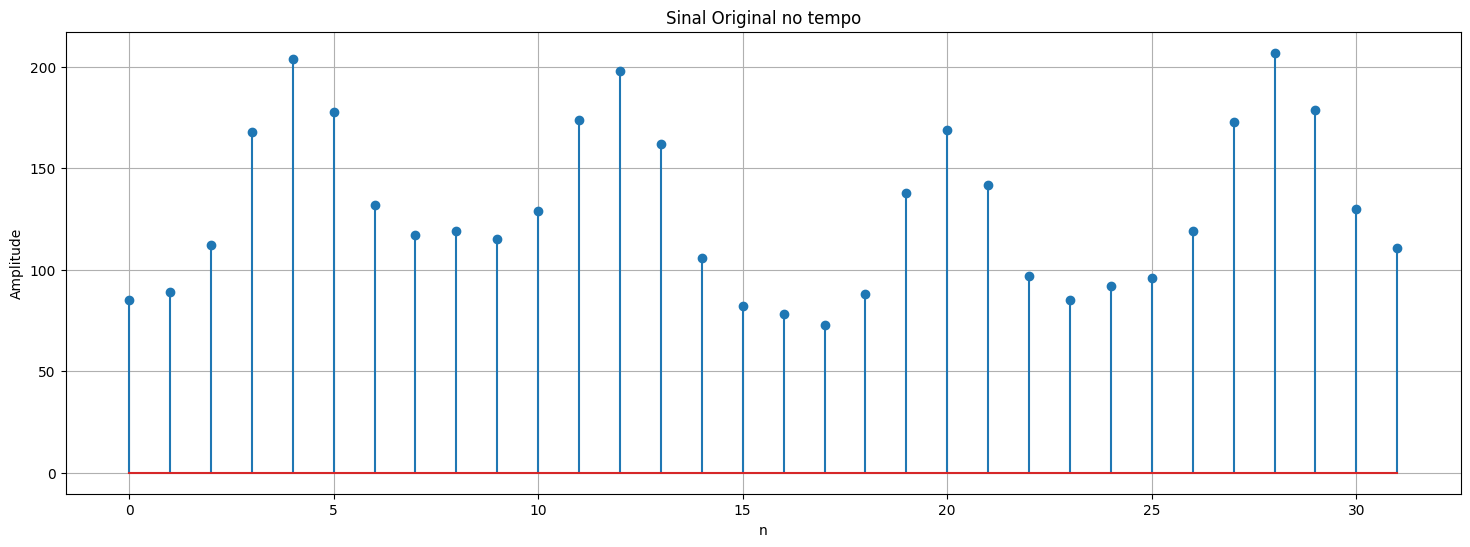

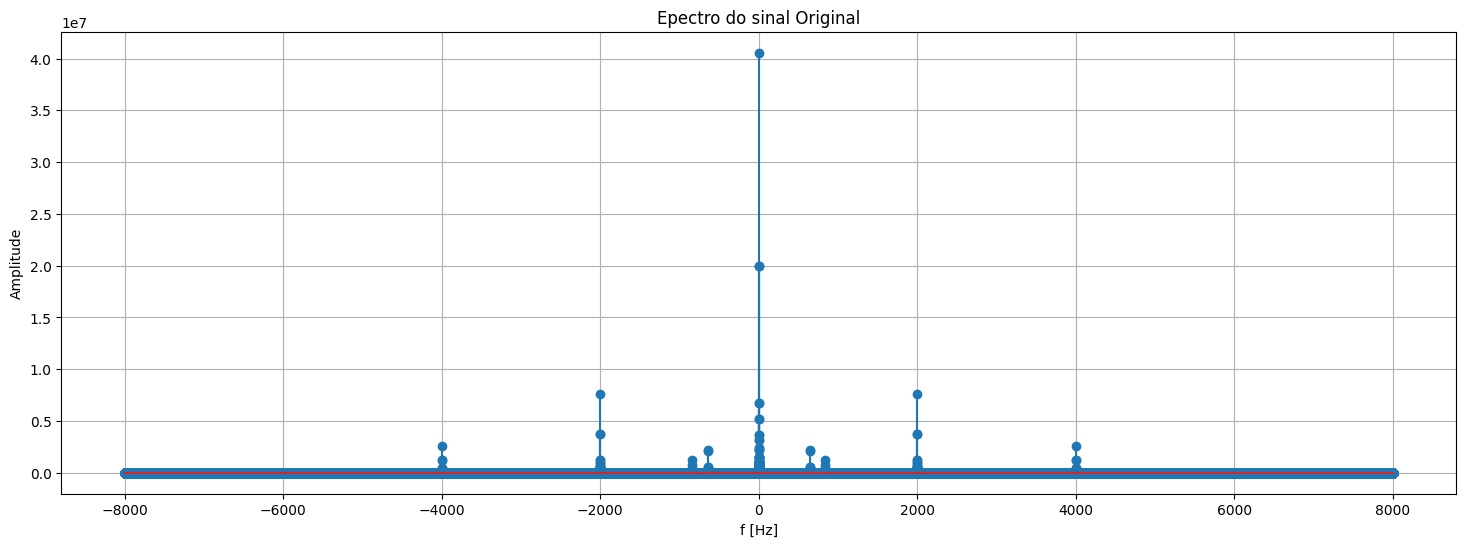

In [33]:
fs, x = wavfile.read('Dados/sinal_1.wav')
X = myFFTShift(myFFT(x))

plt.figure(figsize=(18, 6))
plt.stem(x[len(x)//2:len(x)//2 + 32])
plt.grid()
plt.title('Sinal Original no tempo')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.figure(figsize=(18, 6))
plt.stem(np.arange(-fs//2, fs//2, fs/len(X)),np.abs(X))
plt.grid()
plt.title('Epectro do sinal Original')
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')

# Projetando os Filtro FIR

In [34]:
# Caractetisticas do filtro
ordem = 81                            #Número de atrasos + 1
freq_lp = 100                         #Filtro para o nivel DC
freq_bp_inf, freq_bp_sup = 1500, 2500 #Filtro para a componente de 2kHz
freq_hp = 3000                        #Filtro para a componente de 4kHz

freqN0 = 1000                         #Filtro para tirar o nivel DC

h_lp = firwin(ordem, freq_lp,                    fs=fs,  pass_zero =  'lowpass')
h_bp = firwin(ordem, [freq_bp_inf, freq_bp_sup], fs=fs,  pass_zero = 'bandpass')
h_hp = firwin(ordem, freq_hp,                    fs=fs,  pass_zero = 'highpass')
h_N0 = firwin(ordem, freqN0,                     fs=fs,  pass_zero = 'highpass')

H_LP = myFFT(h_lp)
H_BP = myFFT(h_bp)
H_HP = myFFT(h_hp)
H_N0 = myFFT(h_N0)

## Filtros no tempo e na frequência

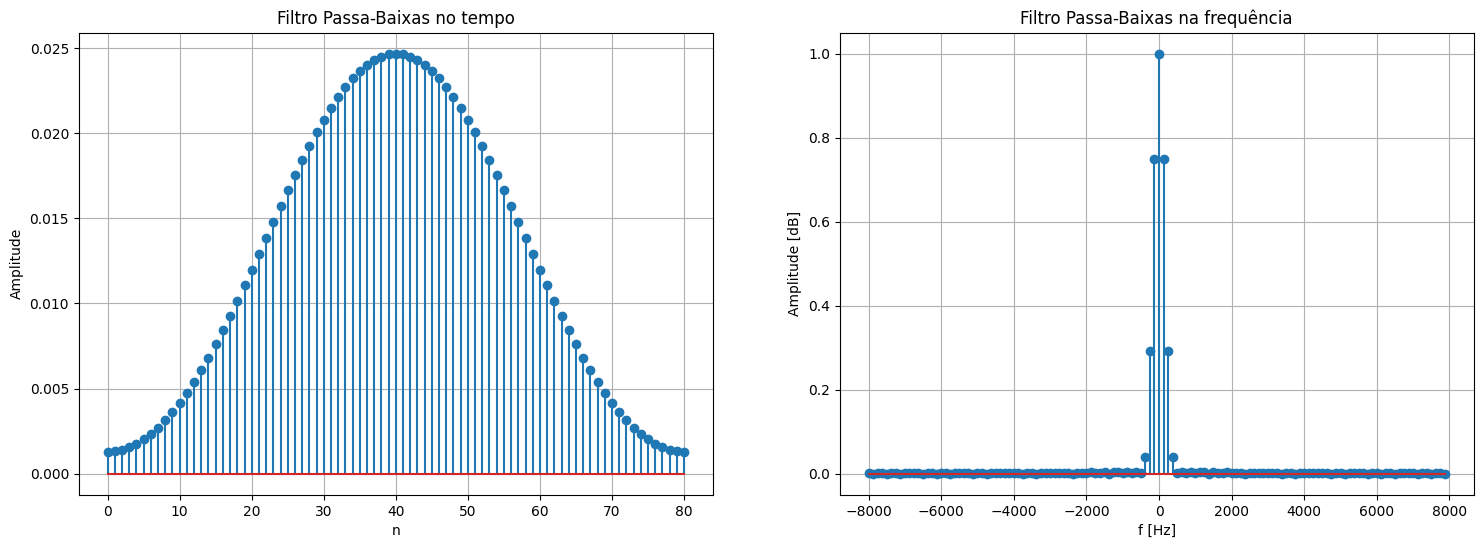

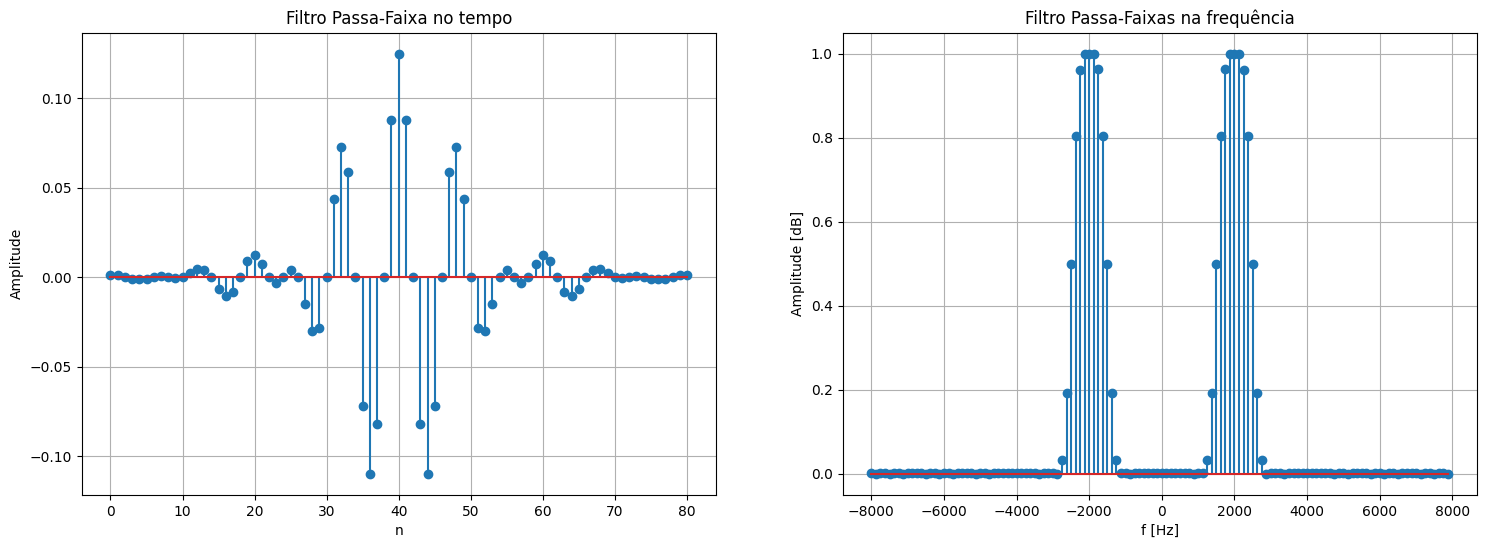

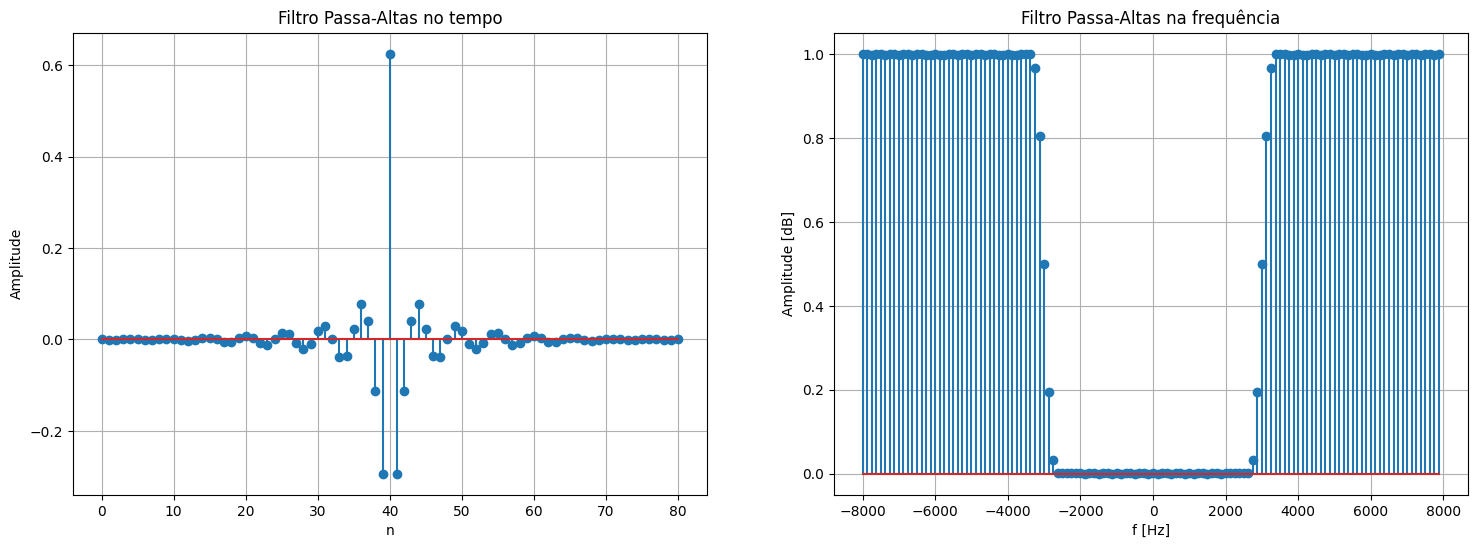

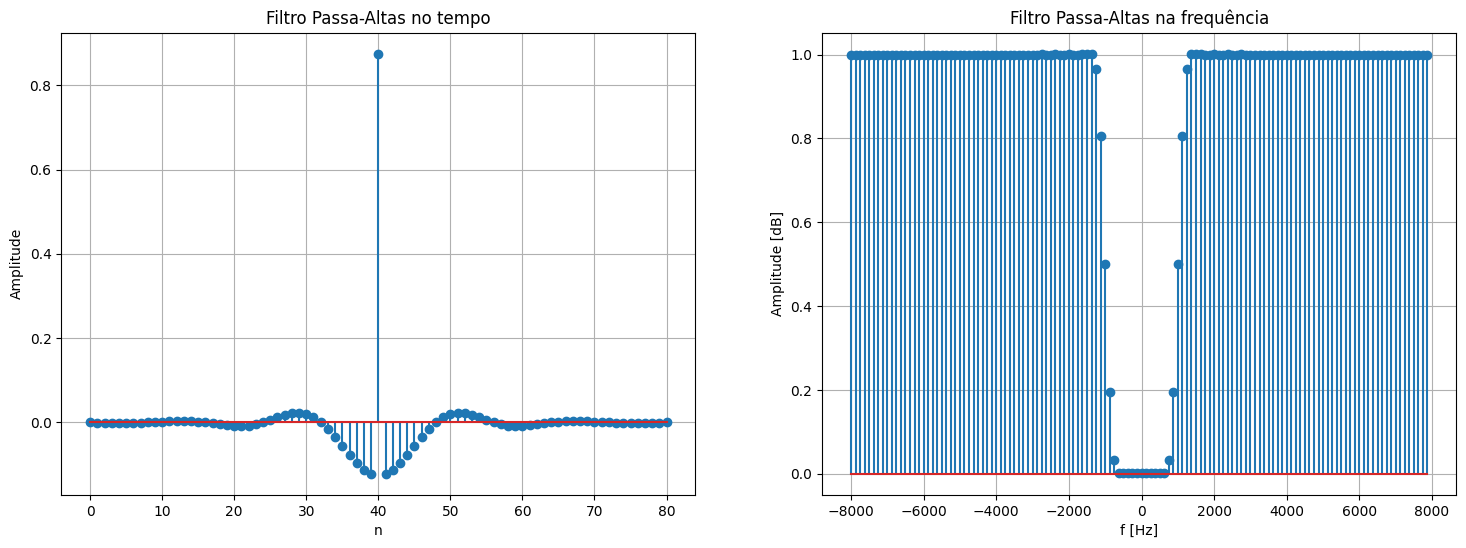

In [35]:
showTimeFreqSignal(h_lp, H_LP,fs, 'Filtro Passa-Baixas no tempo', 'Filtro Passa-Baixas na frequência')
showTimeFreqSignal(h_bp, H_BP,fs, 'Filtro Passa-Faixa no tempo',  'Filtro Passa-Faixas na frequência')
showTimeFreqSignal(h_hp, H_HP,fs, 'Filtro Passa-Altas no tempo',  'Filtro Passa-Altas na frequência')
showTimeFreqSignal(h_N0, H_N0,fs, 'Filtro Passa-Altas no tempo',  'Filtro Passa-Altas na frequência')

# Separando as componentes do sinal Original

In [36]:
c_0  = myConvolution(x, h_lp)
c_2k = myConvolution(x, h_bp)
c_4k = myConvolution(x, h_hp)
c_N0 = myConvolution(x, h_N0)

C_0  = myFFT( c_0)
C_2k = myFFT(c_2k)
C_4k = myFFT(c_4k)
C_N0 = myFFT(c_N0)

## Mostrando as componentes no tempo e na frequência

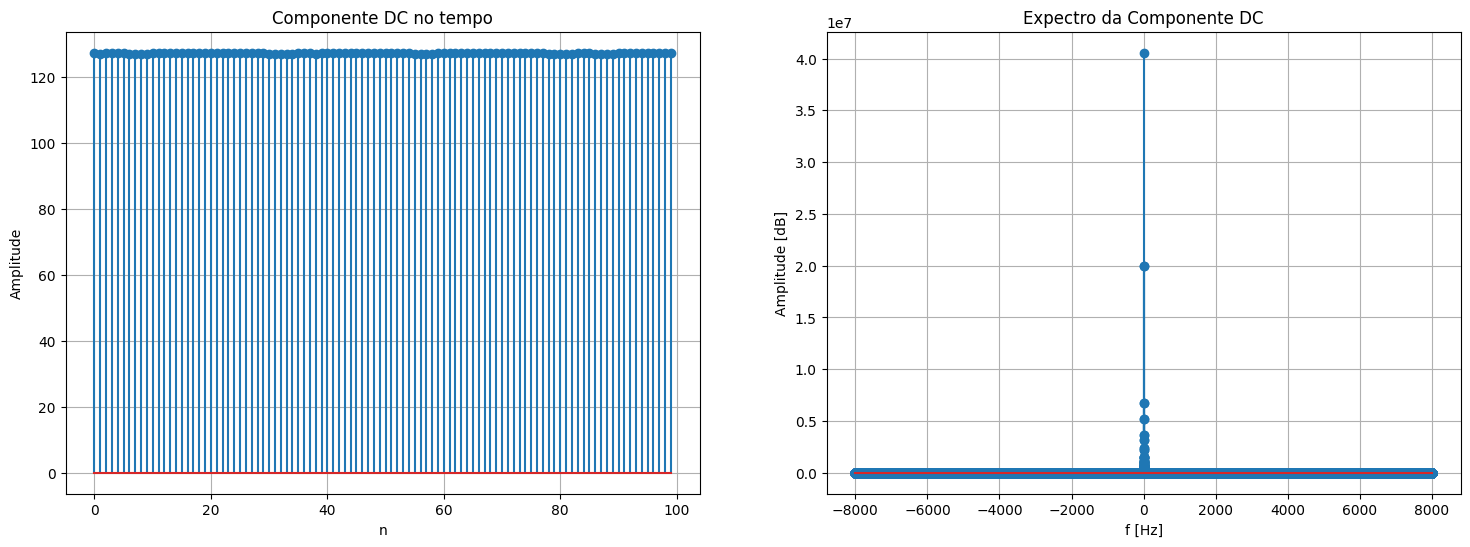

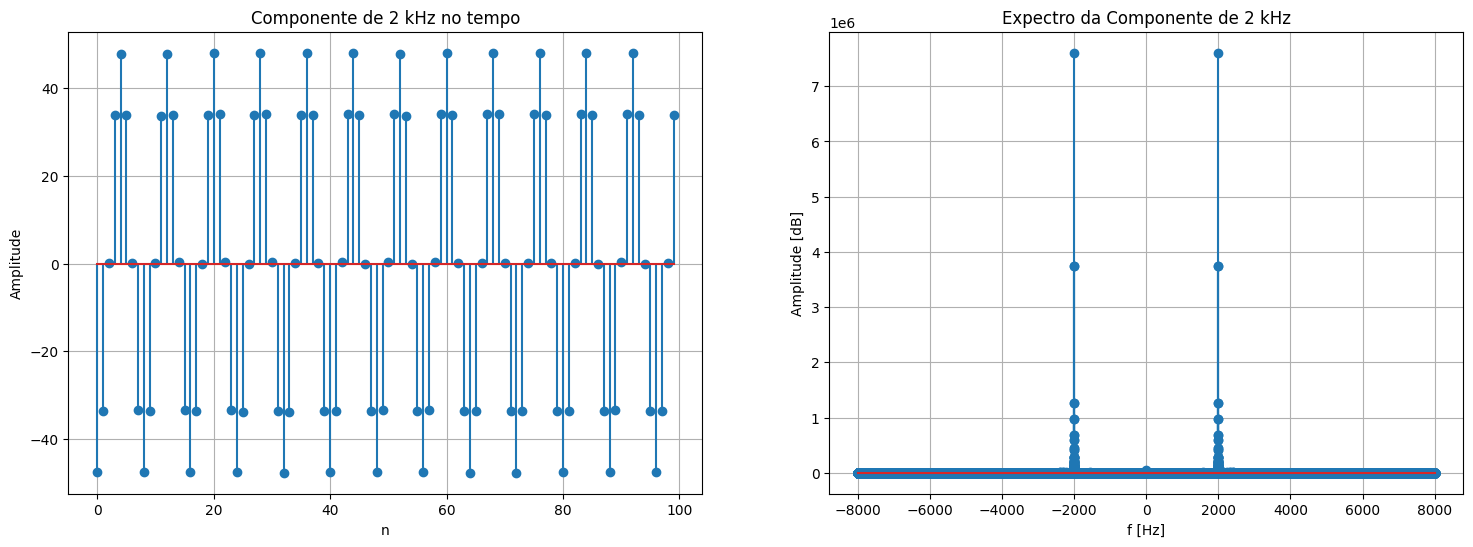

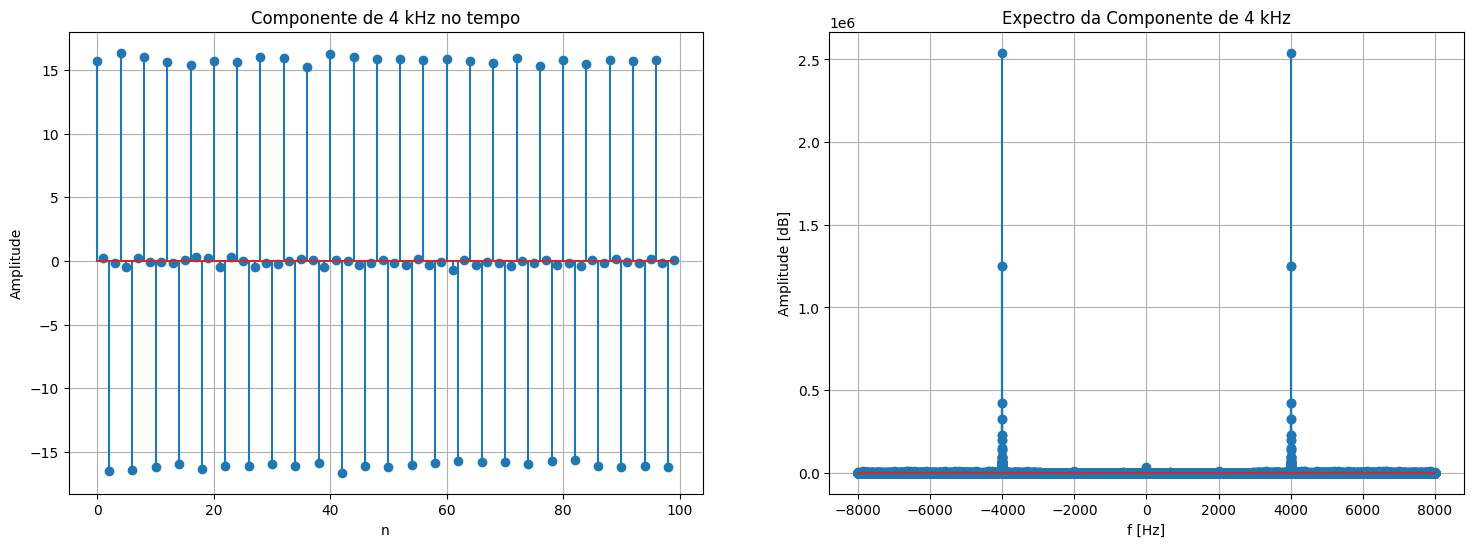

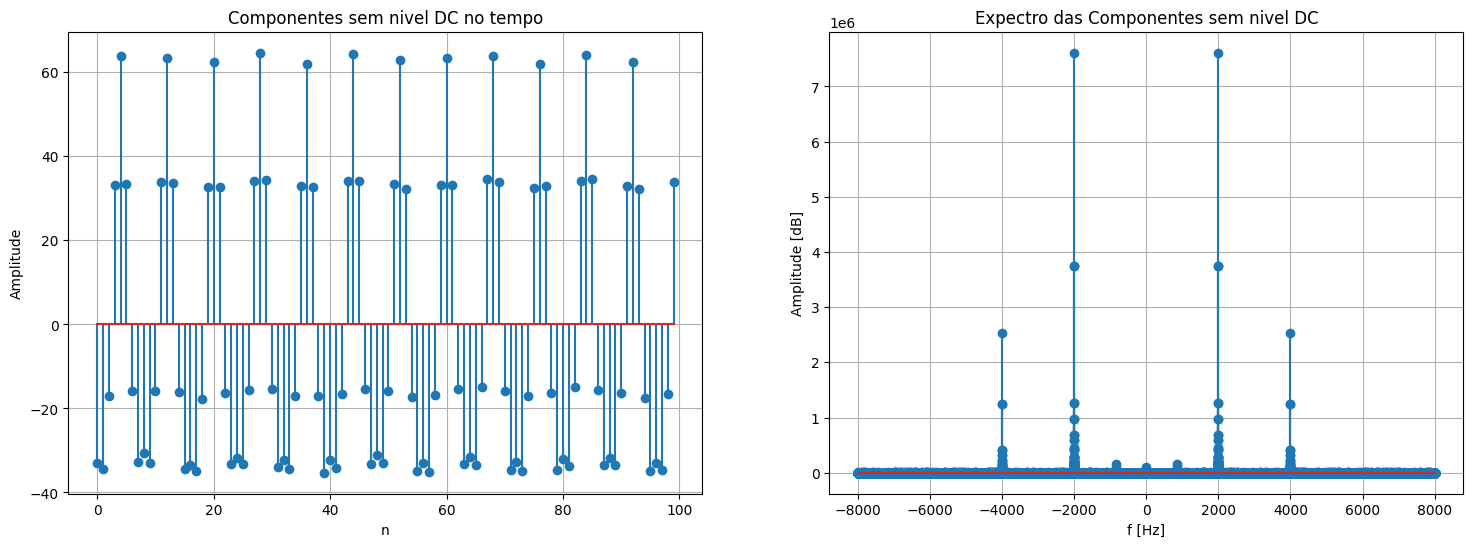

In [37]:
showTimeFreqSignal(c_0[len(c_0)//2: len(c_0)//2 + 100],   C_0,  fs, 'Componente DC no tempo',            'Expectro da Componente DC'            )
showTimeFreqSignal(c_2k[len(c_2k)//2: len(c_2k)//2 + 100],C_2k, fs, 'Componente de 2 kHz no tempo',      'Expectro da Componente de 2 kHz'      )
showTimeFreqSignal(c_4k[len(c_4k)//2: len(c_4k)//2 + 100],C_4k, fs, 'Componente de 4 kHz no tempo',      'Expectro da Componente de 4 kHz'      )
showTimeFreqSignal(c_N0[len(c_N0)//2: len(c_N0)//2 + 100],C_N0, fs, 'Componentes sem nivel DC no tempo', 'Expectro das Componentes sem nivel DC')

# Salvando as componentes em arquivos de áudio

In [38]:
def saveWavfile(x, fs, filePath=''):
    x_norm = x/np.max(np.abs(x))
    x_int16 = np.int16(x_norm*32767)

    wavfile.write(filePath, fs, x_int16)

In [39]:
saveWavfile(c_0,  fs, 'Dados/Filtragem_FIR/Comp_DC.wav')
saveWavfile(c_2k, fs, 'Dados/Filtragem_FIR/Comp_2kHz.wav')
saveWavfile(c_4k, fs, 'Dados/Filtragem_FIR/Comp_4kHz.wav')
saveWavfile(c_N0, fs, 'Dados/Filtragem_FIR/Comp_N0.wav')